In [126]:
# Data manipulation & numerical computation
import pandas as pd
import numpy as np 
# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# Decision tree model
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
# Preprocessing and feature engineering
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
# model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [127]:
df=pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

In [128]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [129]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [131]:
df.shape

(908, 13)

In [132]:
df_desc=pd.read_excel("heart_disease.xlsx",sheet_name="Description",header=None)

In [133]:
df_desc

,0,1
0,age,Age in years
1,Gender,"Gender ; Male - 1, Female -0"
2,cp,Chest pain type
3,trestbps,Resting blood pressure
4,chol,cholesterol measure
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
6,restecg,"ecg observation at resting condition, -- Val..."
7,thalch,maximum heart rate achieved
8,exang,exercise induced angina
9,oldpeak,ST depression induced by exercise relative to ...


In [134]:
heart_df=df.rename(columns={'cp':'Chest_pain','trestbps':'rest_BP','chol':'cholestrol','fbs':'fasting_bs','thalch':'max_HR','exang':'excercise_angina','thal':'thallassemia'})

In [135]:
heart_df

,age,sex,Chest_pain,rest_BP,cholestrol,fasting_bs,restecg,max_HR,excercise_angina,oldpeak,slope,thallassemia,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [136]:
heart_df.isnull().sum()

age                  0
sex                  0
Chest_pain           0
rest_BP              0
cholestrol           0
fasting_bs           0
restecg              0
max_HR               0
excercise_angina     0
oldpeak             62
slope                0
thallassemia         0
num                  0
dtype: int64

In [137]:
heart_df.describe()

,age,rest_BP,cholestrol,max_HR,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [138]:
heart_df[heart_df.duplicated()]

,age,sex,Chest_pain,rest_BP,cholestrol,fasting_bs,restecg,max_HR,excercise_angina,oldpeak,slope,thallassemia,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [139]:
heart_df.drop_duplicates(inplace=True)

In [140]:
heart_df.reset_index(drop=True,inplace=True)

In [141]:
heart_df.tail()

,age,sex,Chest_pain,rest_BP,cholestrol,fasting_bs,restecg,max_HR,excercise_angina,oldpeak,slope,thallassemia,num
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
906,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [142]:
heart_df.dtypes

age                   int64
sex                  object
Chest_pain           object
rest_BP               int64
cholestrol            int64
fasting_bs             bool
restecg              object
max_HR                int64
excercise_angina     object
oldpeak             float64
slope                object
thallassemia         object
num                   int64
dtype: object

In [143]:
heart_df['oldpeak'].describe()

count    845.000000
mean       0.892308
std        1.094092
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [144]:
heart_df['oldpeak'].fillna(heart_df['oldpeak'].mean(),inplace=True)

In [145]:
heart_df['oldpeak'].describe()

count    907.000000
mean       0.892308
std        1.055993
min       -2.600000
25%        0.000000
50%        0.800000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

(array([  2.,   5., 362., 157., 200., 117.,  44.,  17.,   1.,   2.]),
 array([-2.6 , -1.72, -0.84,  0.04,  0.92,  1.8 ,  2.68,  3.56,  4.44,
         5.32,  6.2 ]),
 <BarContainer object of 10 artists>)

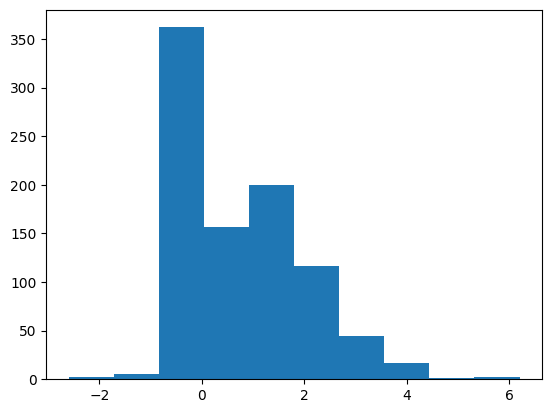

In [146]:
plt.hist(heart_df['oldpeak'])

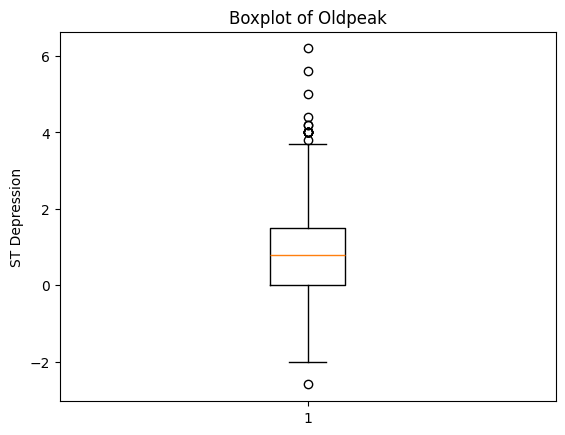

In [147]:
oldpeak_box=plt.boxplot(heart_df['oldpeak'])
plt.title("Boxplot of Oldpeak")
plt.ylabel("ST Depression")
plt.show()

In [148]:
x=[]
for i in oldpeak_box['fliers']:
    x.append(i.get_ydata())
print(len(x[0]))
x 

16


[array([-2.6,  4.2,  4. ,  5. ,  4. ,  4. ,  6.2,  5.6,  4. ,  4.2,  4. ,
         4.4,  4. ,  3.8,  4. ,  4. ])]

In [149]:
Q1 = heart_df['oldpeak'].quantile(0.25)
Q3 = heart_df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_df[(heart_df['oldpeak'] < lower_bound) | (heart_df['oldpeak'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 16


In [150]:
# Cap Outliers
heart_df['oldpeak'] = np.where(heart_df['oldpeak'] > upper_bound, upper_bound,
                        np.where(heart_df['oldpeak'] < lower_bound, lower_bound, heart_df['oldpeak']))

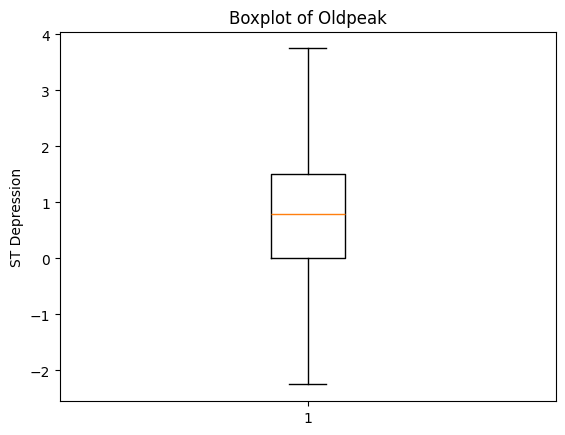

In [151]:
oldpeak_box=plt.boxplot(heart_df['oldpeak'])
plt.title("Boxplot of Oldpeak")
plt.ylabel("ST Depression")
plt.show()

(array([  2.,   2.,   7., 367.,  67., 190.,  96., 105.,  44.,  27.]),
 array([-2.25, -1.65, -1.05, -0.45,  0.15,  0.75,  1.35,  1.95,  2.55,
         3.15,  3.75]),
 <BarContainer object of 10 artists>)

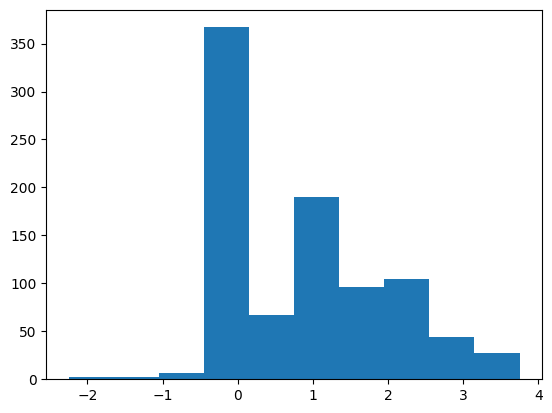

In [152]:
plt.hist(heart_df['oldpeak'])

In [153]:
heart_df['oldpeak'].skew() # as we are hoing to use decision tree,so this skew is not that much matter 

np.float64(0.8439940186124149)

In [154]:
heart_df.count()

age                 907
sex                 907
Chest_pain          907
rest_BP             907
cholestrol          907
fasting_bs          907
restecg             907
max_HR              907
excercise_angina    907
oldpeak             907
slope               907
thallassemia        907
num                 907
dtype: int64

In [155]:
heart_df.columns

Index(['age', 'sex', 'Chest_pain', 'rest_BP', 'cholestrol', 'fasting_bs',
       'restecg', 'max_HR', 'excercise_angina', 'oldpeak', 'slope',
       'thallassemia', 'num'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

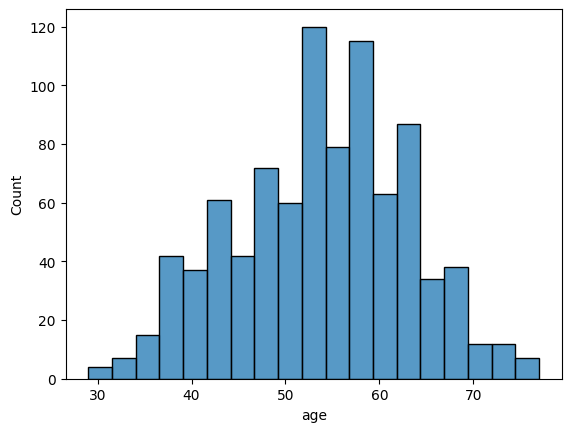

In [156]:
sns.histplot(heart_df['age'])

<Axes: ylabel='age'>

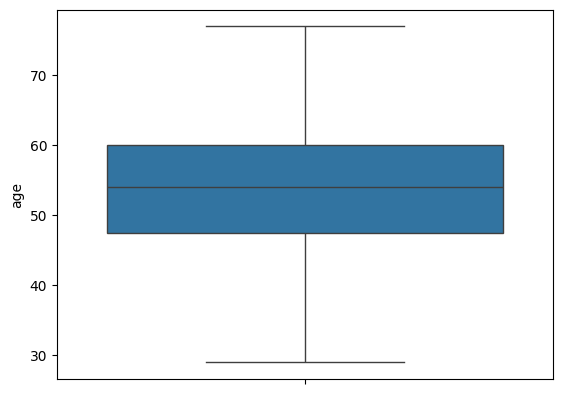

In [157]:
sns.boxplot(heart_df['age'])

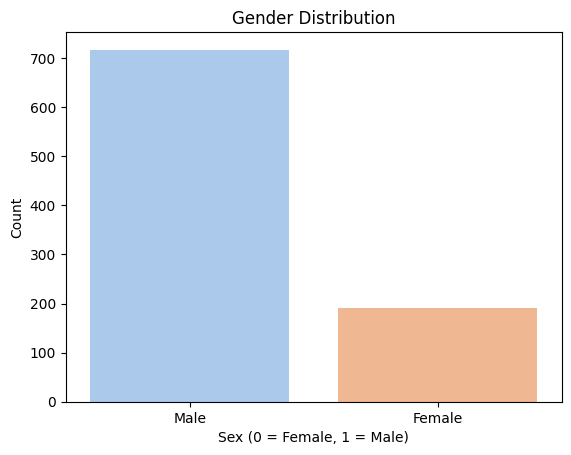

In [158]:
sns.countplot(x='sex',data=heart_df,palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

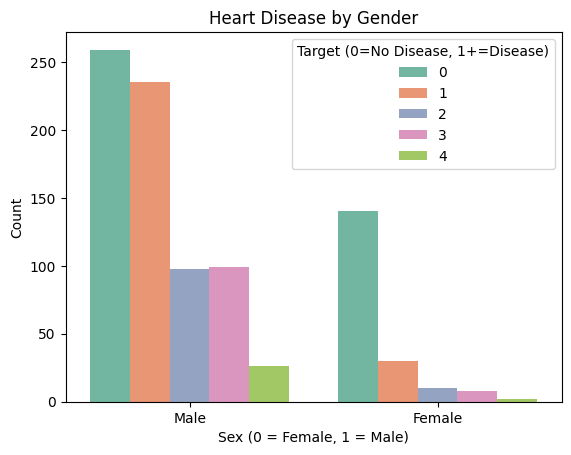

In [159]:
sns.countplot(x='sex', hue='num', data=heart_df, palette='Set2')
plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Target (0=No Disease, 1+=Disease)")
plt.show()

In [160]:
cross_tab=pd.crosstab(heart_df['sex'],heart_df['num'])

In [161]:
from scipy.stats import chi2_contingency

In [162]:
chi2,p,dof,expected=chi2_contingency(cross_tab)
print("Chi2 Value:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Value: 86.86277174921426
p-value: 6.104901102856821e-18
Degrees of Freedom: 4
Expected Frequencies:
 [[ 83.58324146  55.51267916  22.62403528  22.41455347   5.86549063]
 [315.41675854 209.48732084  85.37596472  84.58544653  22.13450937]]


**here the p value is extremely small, less than typical threshold of 0.05.
So,There is a significance association b/w the age and num**

In [163]:
heart_df['Chest_pain'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [164]:
cp_crosstab=pd.crosstab(heart_df['Chest_pain'],heart_df['num'])

In [165]:
cp_crosstab

num,0,1,2,3,4
Chest_pain,,,,,
asymptomatic,103,197,89,83,23
atypical angina,141,19,2,3,0
non-anginal,130,37,13,18,4
typical angina,25,12,4,3,1


In [166]:
chi2,p,dof,expected=chi2_contingency(cp_crosstab)
print("Chi2 Value:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2 Value: 263.5816156929115
p-value: 1.9993471007900695e-49
Degrees of Freedom: 12
Expected Frequencies:
 [[217.75633958 144.62513782  58.9415656   58.39581036  15.28114664]
 [ 72.58544653  48.20837927  19.64718853  19.46527012   5.09371555]
 [ 88.86218302  59.01874311  24.05292172  23.83020948   6.23594267]
 [ 19.79603087  13.1477398    5.35832415   5.30871003   1.38919515]]


**here the p value is extremely small, less than typical threshold of 0.05. So,There is a significance association b/w the Chest_pain_type and num**

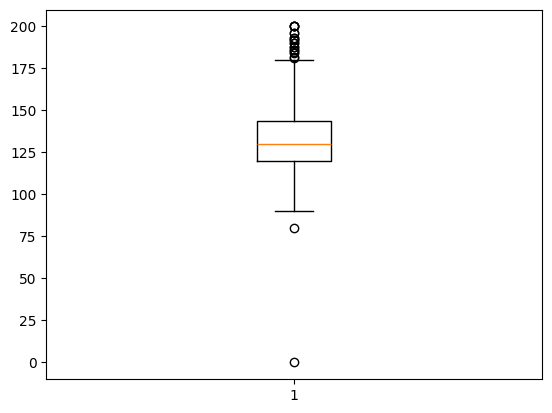

In [167]:
rest_BP_box=plt.boxplot(heart_df['rest_BP'])

In [168]:
y=[]
for i in rest_BP_box['fliers']:
    y.append(i.get_ydata())
print(len(y[0]))
y

22


[array([ 80,   0, 190, 181, 188, 193, 196, 192, 185, 200, 184, 192, 186,
        200, 200, 200, 188, 182, 196, 193, 186, 190])]

In [169]:
Q1 = heart_df['rest_BP'].quantile(0.25)
Q3 = heart_df['rest_BP'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Cap Outliers
heart_df['rest_BP'] = np.where(heart_df['rest_BP'] > upper_bound, upper_bound,
                        np.where(heart_df['rest_BP'] < lower_bound, lower_bound, heart_df['rest_BP']))

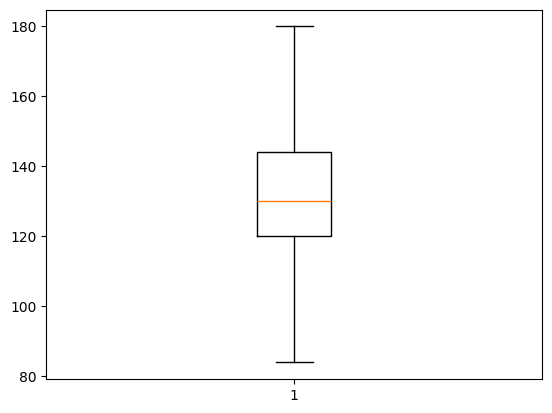

In [170]:
rest_BP_box=plt.boxplot(heart_df['rest_BP'])

<Axes: xlabel='rest_BP', ylabel='Count'>

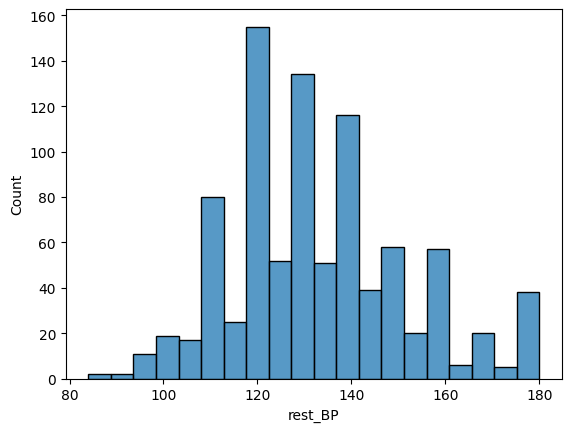

In [171]:
sns.histplot(heart_df['rest_BP'])

In [172]:
heart_df['rest_BP'].skew()

np.float64(0.49630889947885826)

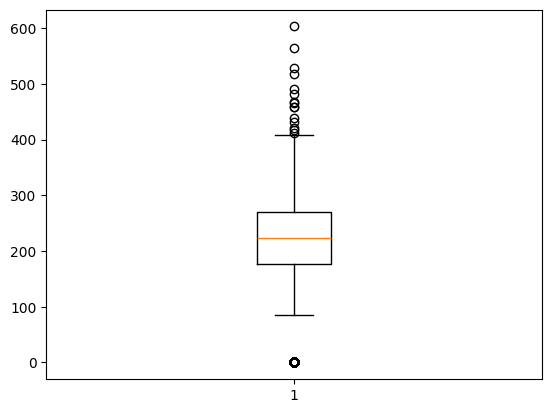

In [173]:
cholestol_BP_box=plt.boxplot(heart_df['cholestrol'])

In [174]:
y=[]
for i in cholestol_BP_box['fliers']:
    y.append(i.get_ydata())
print(len(y[0]))
y

187


[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 417, 439, 564, 458, 481, 459

In [175]:
Q1 = heart_df['cholestrol'].quantile(0.25)
Q3 = heart_df['cholestrol'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Cap Outliers
heart_df['cholestrol'] = np.where(heart_df['cholestrol'] > upper_bound, upper_bound,
                        np.where(heart_df['cholestrol'] < lower_bound, lower_bound, heart_df['cholestrol']))

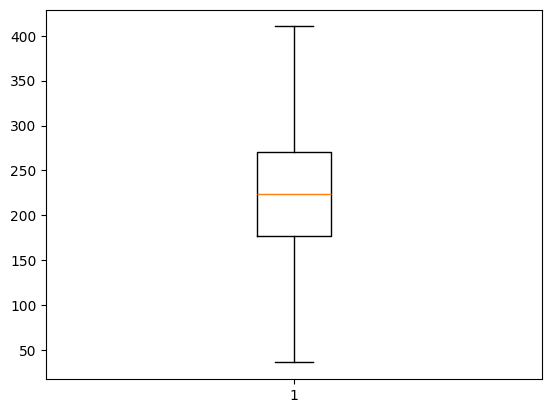

In [176]:
cholestol_BP_box=plt.boxplot(heart_df['cholestrol'])

<Axes: xlabel='cholestrol', ylabel='Count'>

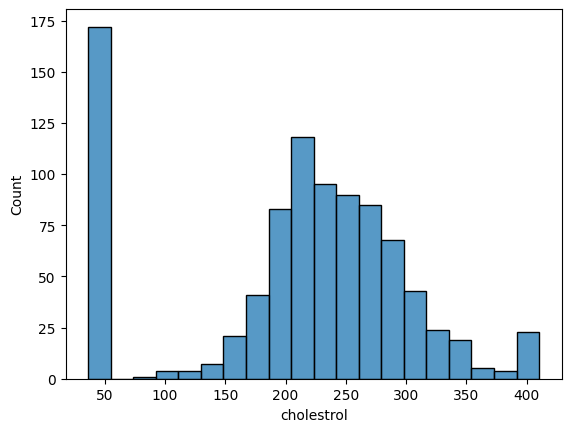

In [177]:
sns.histplot(heart_df['cholestrol'])

In [178]:
heart_df['cholestrol'].skew()

np.float64(-0.5458840525753456)

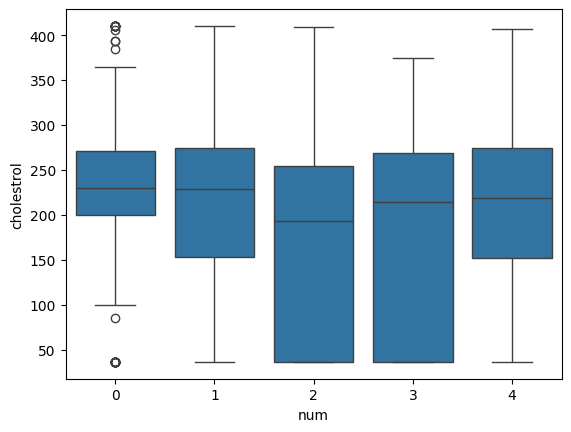

In [179]:
sns.boxplot(x='num', y='cholestrol', data=heart_df)
plt.show()

In [180]:
from scipy.stats import f_oneway

In [181]:
grouped = [heart_df[heart_df['num']==c]['cholestrol'] for c in heart_df['num'].unique()]
f_stat, p_value = f_oneway(*grouped)
print(f_stat, p_value)

17.590026018360472 6.529742893038911e-14


**Here the p value is less than the typical threshold value 0.05.
So the cholestrol and the num are related**

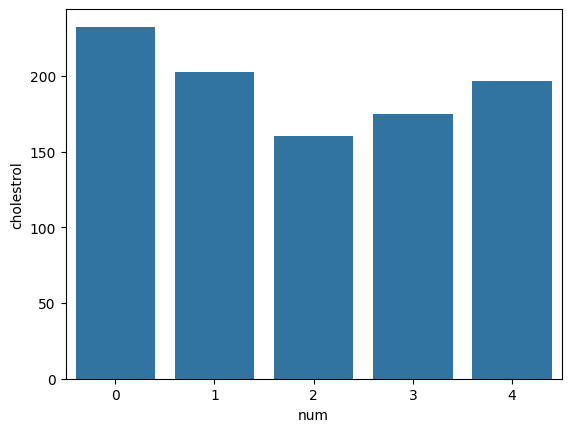

In [182]:
sns.barplot(x='num', y='cholestrol', data=heart_df, ci=None)
plt.show()

In [183]:
heart_df.columns

Index(['age', 'sex', 'Chest_pain', 'rest_BP', 'cholestrol', 'fasting_bs',
       'restecg', 'max_HR', 'excercise_angina', 'oldpeak', 'slope',
       'thallassemia', 'num'],
      dtype='object')

<Axes: xlabel='fasting_bs', ylabel='count'>

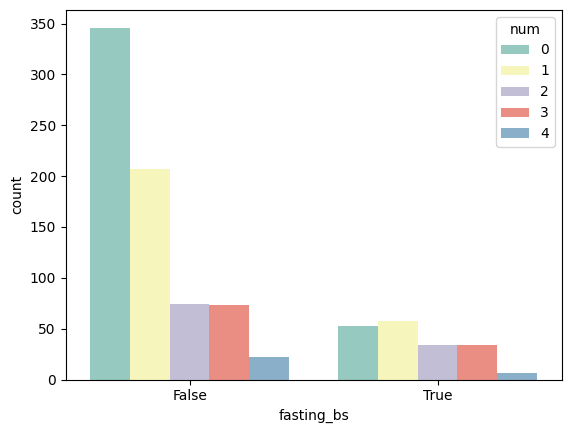

In [184]:
sns.countplot(x='fasting_bs',hue='num',data=heart_df,palette='Set3')

In [185]:
fast_crosstab=pd.crosstab(heart_df['fasting_bs'],heart_df['num'])

In [186]:
chi2_contingency(fast_crosstab)

Chi2ContingencyResult(statistic=np.float64(29.52167006247896), pvalue=np.float64(6.123927223864729e-06), dof=4, expected_freq=array([[317.61631753, 210.94818082,  85.97133407,  85.1753032 ,
         22.28886439],
       [ 81.38368247,  54.05181918,  22.02866593,  21.8246968 ,
          5.71113561]]))

**Here the p value is less than the typical threshold value 0.05. So the fating_bs and the num are related**

In [187]:
heart_df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [188]:
heart_df['restecg'].value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    178
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

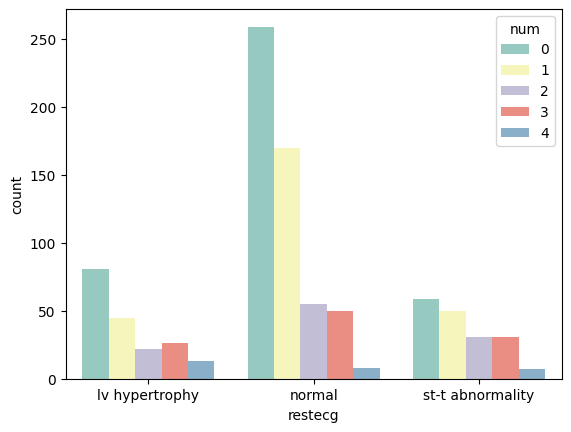

In [189]:
sns.countplot(x='restecg',hue='num',data=heart_df,palette='Set3')

In [190]:
heart_df['max_HR'].describe()

count    907.000000
mean     135.976847
std       26.813075
min       60.000000
25%      118.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: max_HR, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1cbbfeed310>,
 'caps': [<matplotlib.lines.Line2D at 0x1cbbfeed590>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cbbfeed1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cbbfeed810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cbbfeed950>],
 'means': []}

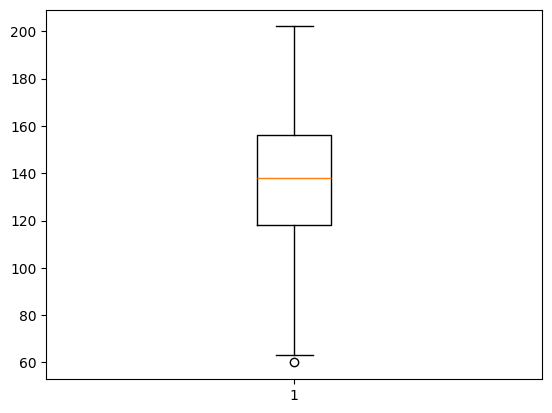

In [191]:
plt.boxplot(heart_df['max_HR'])

(array([ 17.,  22.,  70., 106., 177., 169., 146., 129.,  61.,  10.]),
 array([ 60. ,  74.2,  88.4, 102.6, 116.8, 131. , 145.2, 159.4, 173.6,
        187.8, 202. ]),
 <BarContainer object of 10 artists>)

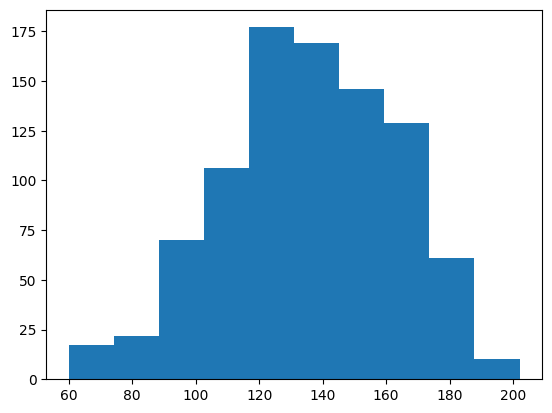

In [192]:
plt.hist(heart_df['max_HR'])

In [193]:
heart_df['max_HR'].skew()

np.float64(-0.22148515620028666)

In [194]:
grouped = [heart_df[heart_df['num']==c]['max_HR'] for c in heart_df['num'].unique()]
f_stat, p_value = f_oneway(*grouped)
print(f_stat, p_value)

34.71545500018554 5.5004101825479984e-27


**Here the p value is less than the typical threshold value 0.05. So the max_HR and the num are related**

In [195]:
heart_df['excercise_angina'].value_counts()

excercise_angina
False    516
True     336
TURE      36
FALSE     19
Name: count, dtype: int64

In [196]:
heart_df['excercise_angina'].replace({'TURE':True,'FALSE':False},inplace=True)

In [197]:
heart_df['excercise_angina'].unique()

array([False,  True])

In [198]:
heart_df['excercise_angina'].value_counts()

excercise_angina
False    535
True     372
Name: count, dtype: int64

<Axes: xlabel='excercise_angina', ylabel='count'>

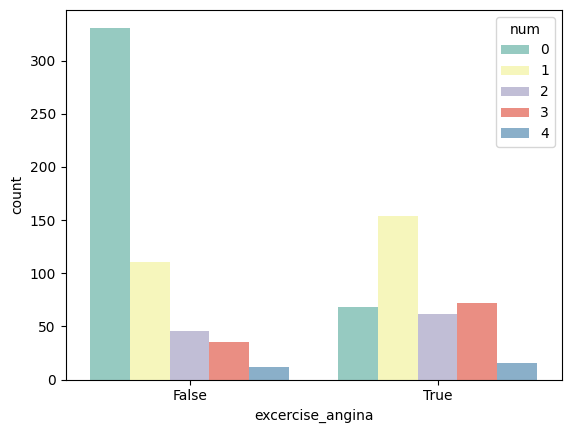

In [199]:
sns.countplot(x='excercise_angina',hue='num',data=heart_df,palette='Set3')

In [200]:
heart_df['oldpeak']

0      2.300000
1      0.000000
2      0.400000
3      0.000000
4      1.500000
         ...   
902    1.500000
903    3.000000
904    2.500000
905    0.892308
906    0.892308
Name: oldpeak, Length: 907, dtype: float64

In [201]:
grouped = [heart_df[heart_df['num']==c]['oldpeak'] for c in heart_df['num'].unique()]
f_stat, p_value = f_oneway(*grouped)
print(f_stat, p_value)

51.283059942766656 6.185180207949792e-39


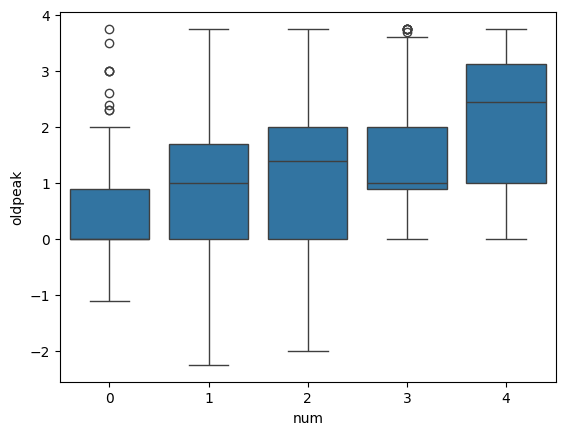

In [202]:
sns.boxplot(x='num', y='oldpeak', data=heart_df)
plt.show()

In [203]:
# From the box plot the more the old peak the more chance of heart attack chance

In [204]:
heart_df.columns

Index(['age', 'sex', 'Chest_pain', 'rest_BP', 'cholestrol', 'fasting_bs',
       'restecg', 'max_HR', 'excercise_angina', 'oldpeak', 'slope',
       'thallassemia', 'num'],
      dtype='object')

In [205]:
heart_df['slope'].value_counts()

slope
flat           453
upsloping      298
downsloping    156
Name: count, dtype: int64

<Axes: xlabel='slope', ylabel='count'>

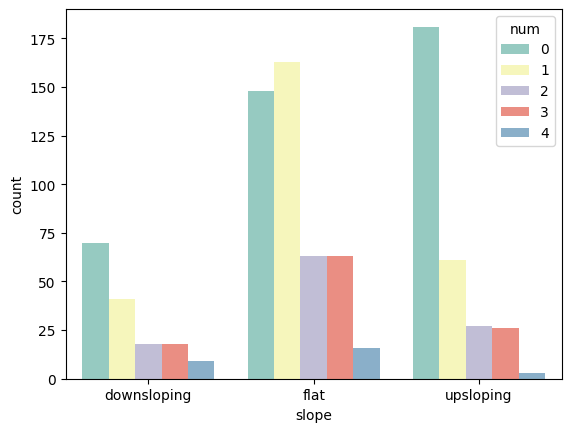

In [206]:
sns.countplot(x='slope',hue='num',data=heart_df,palette='Set3')

In [207]:
slope_crosstab=pd.crosstab(heart_df['slope'],heart_df['num'])

In [208]:
chi2_contingency(slope_crosstab)

Chi2ContingencyResult(statistic=np.float64(63.35690365158029), pvalue=np.float64(1.0188248269067194e-10), dof=8, expected_freq=array([[ 68.62624035,  45.57883131,  18.5755237 ,  18.40352811,
          4.81587652],
       [199.2800441 , 132.353914  ,  53.94046307,  53.44101433,
         13.9845645 ],
       [131.09371555,  87.06725469,  35.48401323,  35.15545755,
          9.19955899]]))

In [209]:
# here the p value is less than threshold so reject null hypothesis and then the slope and num column are related

In [210]:
heart_df['thallassemia'].value_counts()

thallassemia
normal               385
reversable defect    346
fixed defect         176
Name: count, dtype: int64

<Axes: xlabel='thallassemia', ylabel='count'>

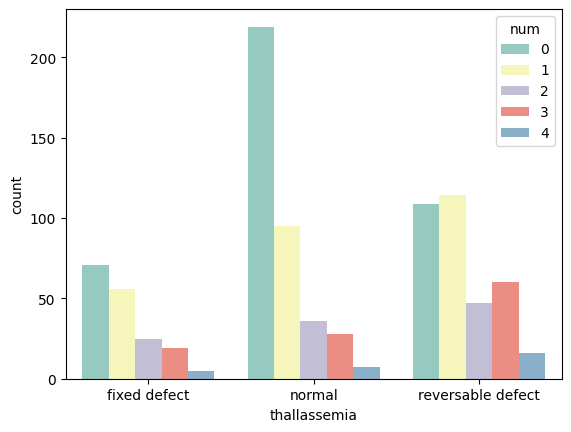

In [211]:
sns.countplot(x='thallassemia',hue='num',data=heart_df,palette='Set3')

In [212]:
thal_crosstab=pd.crosstab(heart_df['thallassemia'],heart_df['num'])

In [213]:
chi2_contingency(thal_crosstab)

Chi2ContingencyResult(statistic=np.float64(56.36473734842853), pvalue=np.float64(2.3951085983640526e-09), dof=8, expected_freq=array([[ 77.4244763 ,  51.42227122,  20.9570011 ,  20.7629548 ,
          5.43329658],
       [169.3660419 , 112.4862183 ,  45.84343991,  45.41896362,
         11.88533627],
       [152.20948181, 101.09151047,  41.19955899,  40.81808159,
         10.68136714]]))

In [214]:
# here the p value is less than threshold so reject null hypothesis and then the thallassemia and num column are related

In [215]:
heart_df.head()

,age,sex,Chest_pain,rest_BP,cholestrol,fasting_bs,restecg,max_HR,excercise_angina,oldpeak,slope,thallassemia,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135.0,203.0,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140.0,192.0,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118.0,186.0,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110.0,201.0,False,normal,126,True,1.5,flat,fixed defect,0


In [216]:
heart_df['fasting_bs']=heart_df['fasting_bs'].astype(int)

In [217]:
heart_df['excercise_angina']=heart_df['excercise_angina'].astype(int)

In [218]:
heart_df.head()

,age,sex,Chest_pain,rest_BP,cholestrol,fasting_bs,restecg,max_HR,excercise_angina,oldpeak,slope,thallassemia,num
0,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135.0,203.0,0,normal,132,0,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140.0,192.0,0,normal,148,0,0.4,flat,fixed defect,0
3,52,Male,typical angina,118.0,186.0,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110.0,201.0,0,normal,126,1,1.5,flat,fixed defect,0


In [219]:
heart_df.dtypes

age                   int64
sex                  object
Chest_pain           object
rest_BP             float64
cholestrol          float64
fasting_bs            int64
restecg              object
max_HR                int64
excercise_angina      int64
oldpeak             float64
slope                object
thallassemia         object
num                   int64
dtype: object

In [220]:
#Identify all object or category type columns
nominal_cols = heart_df.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode all nominal columns
df_encoded = pd.get_dummies(heart_df, columns=nominal_cols, drop_first=True)

In [221]:
#LE = LabelEncoder()
#for col in nominal_cols:
 #   heart_df[col] = LE.fit_transform([col]heart_df)

In [222]:
df_encoded.head()

,age,rest_BP,cholestrol,fasting_bs,max_HR,excercise_angina,oldpeak,num,sex_Male,Chest_pain_atypical angina,Chest_pain_non-anginal,Chest_pain_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thallassemia_normal,thallassemia_reversable defect
0,63,145.0,233.0,1,150,0,2.3,0,True,False,False,True,False,False,False,False,False,False
1,41,135.0,203.0,0,132,0,0.0,0,True,True,False,False,True,False,True,False,False,False
2,57,140.0,192.0,0,148,0,0.4,0,True,False,False,False,True,False,True,False,False,False
3,52,118.0,186.0,0,190,0,0.0,0,True,False,False,True,False,False,True,False,False,False
4,57,110.0,201.0,0,126,1,1.5,0,True,False,False,False,True,False,True,False,False,False


In [223]:
df_encoded.columns

Index(['age', 'rest_BP', 'cholestrol', 'fasting_bs', 'max_HR',
       'excercise_angina', 'oldpeak', 'num', 'sex_Male',
       'Chest_pain_atypical angina', 'Chest_pain_non-anginal',
       'Chest_pain_typical angina', 'restecg_normal',
       'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping',
       'thallassemia_normal', 'thallassemia_reversable defect'],
      dtype='object')

In [224]:
# List of boolean columns
#bool_cols = ['Chest_pain_asymptomatic','Chest_pain_atypical angina','Chest_pain_non-anginal', 'restecg_lv hypertrophy','restecg_normal','restecg_st-t abnormality', 'slope_downsloping','slope_flat','slope_upsloping','thallassemia_fixed defect','thallassemia_normal','thallassemia_reversable defect']
bool_cols = ['Chest_pain_atypical angina','Chest_pain_non-anginal','restecg_normal','restecg_st-t abnormality','slope_flat','slope_upsloping','thallassemia_normal','thallassemia_reversable defect']
# Convert all True/False to 1/0
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [225]:
#df_encoded.head()

In [226]:
df_encoded.columns

Index(['age', 'rest_BP', 'cholestrol', 'fasting_bs', 'max_HR',
       'excercise_angina', 'oldpeak', 'num', 'sex_Male',
       'Chest_pain_atypical angina', 'Chest_pain_non-anginal',
       'Chest_pain_typical angina', 'restecg_normal',
       'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping',
       'thallassemia_normal', 'thallassemia_reversable defect'],
      dtype='object')

In [227]:
df_encoded

,age,rest_BP,cholestrol,fasting_bs,max_HR,excercise_angina,oldpeak,num,sex_Male,Chest_pain_atypical angina,Chest_pain_non-anginal,Chest_pain_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thallassemia_normal,thallassemia_reversable defect
0,63,145.0,233.00,1,150,0,2.300000,0,True,0,0,True,0,0,0,0,0,0
1,41,135.0,203.00,0,132,0,0.000000,0,True,1,0,False,1,0,1,0,0,0
2,57,140.0,192.00,0,148,0,0.400000,0,True,0,0,False,1,0,1,0,0,0
3,52,118.0,186.00,0,190,0,0.000000,0,True,0,0,True,0,0,1,0,0,0
4,57,110.0,201.00,0,126,1,1.500000,0,True,0,0,False,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,125.0,36.25,0,120,0,1.500000,4,True,0,0,False,1,0,0,1,0,1
903,62,166.0,170.00,0,120,1,3.000000,4,True,0,0,False,0,1,1,0,0,1
904,56,170.0,36.25,0,123,1,2.500000,4,True,0,1,False,0,0,0,0,1,0
905,56,144.0,208.00,1,105,1,0.892308,4,True,0,1,False,0,1,0,0,0,0


In [228]:
df_encoded.corr()

,age,rest_BP,cholestrol,fasting_bs,max_HR,excercise_angina,oldpeak,num,sex_Male,Chest_pain_atypical angina,Chest_pain_non-anginal,Chest_pain_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thallassemia_normal,thallassemia_reversable defect
age,1.000000,0.261741,-0.092618,0.177004,-0.327868,0.192202,0.236688,0.326227,0.051947,-0.184421,-0.021998,0.036915,-0.226296,0.133051,0.074264,-0.079106,-0.039482,0.064602
rest_BP,0.261741,1.000000,0.126318,0.113043,-0.131223,0.150065,0.159684,0.141934,0.018717,-0.049280,0.000213,0.045554,-0.116703,0.117114,0.072251,-0.030522,-0.084160,0.091467
cholestrol,-0.092618,0.126318,1.000000,-0.112193,0.194934,-0.027979,0.030639,-0.228771,-0.194599,0.145559,-0.005675,0.011546,-0.034460,-0.133716,-0.007665,0.039921,0.048695,-0.036606
fasting_bs,0.177004,0.113043,-0.112193,1.000000,-0.065827,0.028502,0.026590,0.156839,0.092480,-0.075572,-0.034208,0.022951,-0.109089,0.121897,0.025184,-0.033688,-0.052747,0.013669
max_HR,-0.327868,-0.131223,0.194934,-0.065827,1.000000,-0.348668,-0.132695,-0.322632,-0.178484,0.220847,0.121594,0.080531,0.041575,-0.180856,-0.220563,0.281344,0.167220,-0.080547
excercise_angina,0.192202,0.150065,-0.027979,0.028502,-0.348668,1.000000,0.380289,0.358837,0.186884,-0.277009,-0.176974,-0.118263,-0.074497,0.112848,0.220593,-0.234913,-0.171906,0.152701
oldpeak,0.236688,0.159684,0.030639,0.026590,-0.132695,0.380289,1.000000,0.418080,0.108269,-0.248252,-0.111558,0.040549,-0.109111,0.044214,0.215500,-0.247755,-0.147367,0.142999
num,0.326227,0.141934,-0.228771,0.156839,-0.322632,0.358837,0.418080,1.000000,0.259258,-0.335455,-0.163444,-0.054802,-0.165450,0.130134,0.164815,-0.195553,-0.212488,0.205019
sex_Male,0.051947,0.018717,-0.194599,0.092480,-0.178484,0.186884,0.108269,0.259258,1.000000,-0.171612,-0.069576,0.005324,-0.013596,0.070181,0.021107,-0.043692,-0.166363,0.136545
Chest_pain_atypical angina,-0.184421,-0.049280,0.145559,-0.075572,0.220847,-0.277009,-0.248252,-0.335455,-0.171612,1.000000,-0.252418,-0.107744,0.107236,-0.045921,-0.088077,0.077814,0.040253,-0.070272


In [229]:
X=df_encoded.drop(columns='num')
y=df_encoded['num']

In [230]:
numeric_cols = ['age', 'rest_BP', 'cholestrol', 'max_HR', 'oldpeak']  # continuous columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [231]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [232]:
model=DecisionTreeClassifier(criterion='entropy')

In [233]:
model.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [234]:
np.unique(y_test)

array([0, 1, 2, 3, 4])

In [235]:
y_pred=model.predict(X_test)

In [236]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_prob = model.predict_proba(X_test) 
# ROC-AUC using One-vs-Rest
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC-AUC (multiclass, OVR):", roc_auc)

Accuracy: 0.510989010989011
Precision (macro): 0.3556736392262708
Recall (macro): 0.3610742796180386
F1 Score (macro): 0.3572905982905983
Confusion Matrix:
 [[60 12  5  3  2]
 [10 21  6 10  5]
 [ 0  7  4  6  0]
 [ 7  7  2  7  1]
 [ 1  1  2  2  1]]
ROC-AUC (multiclass, OVR): 0.6148144321369445


In [237]:
y_train_pred=model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.510989010989011


In [238]:
model_1=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)

In [239]:
model_1.fit(X_train,y_train)
y_train_pred=model_1.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

Train Accuracy: 0.5848275862068966


In [240]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 5,10],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, 
                           cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Train best model
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
y_prob_best = best_dt.predict_proba(X_test)[:,1]

# Evaluate best model
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_best, average='macro'))

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.5824175824175825
Precision: 0.28885572139303484
Recall: 0.32714196372732957
F1 Score: 0.3024348200818789


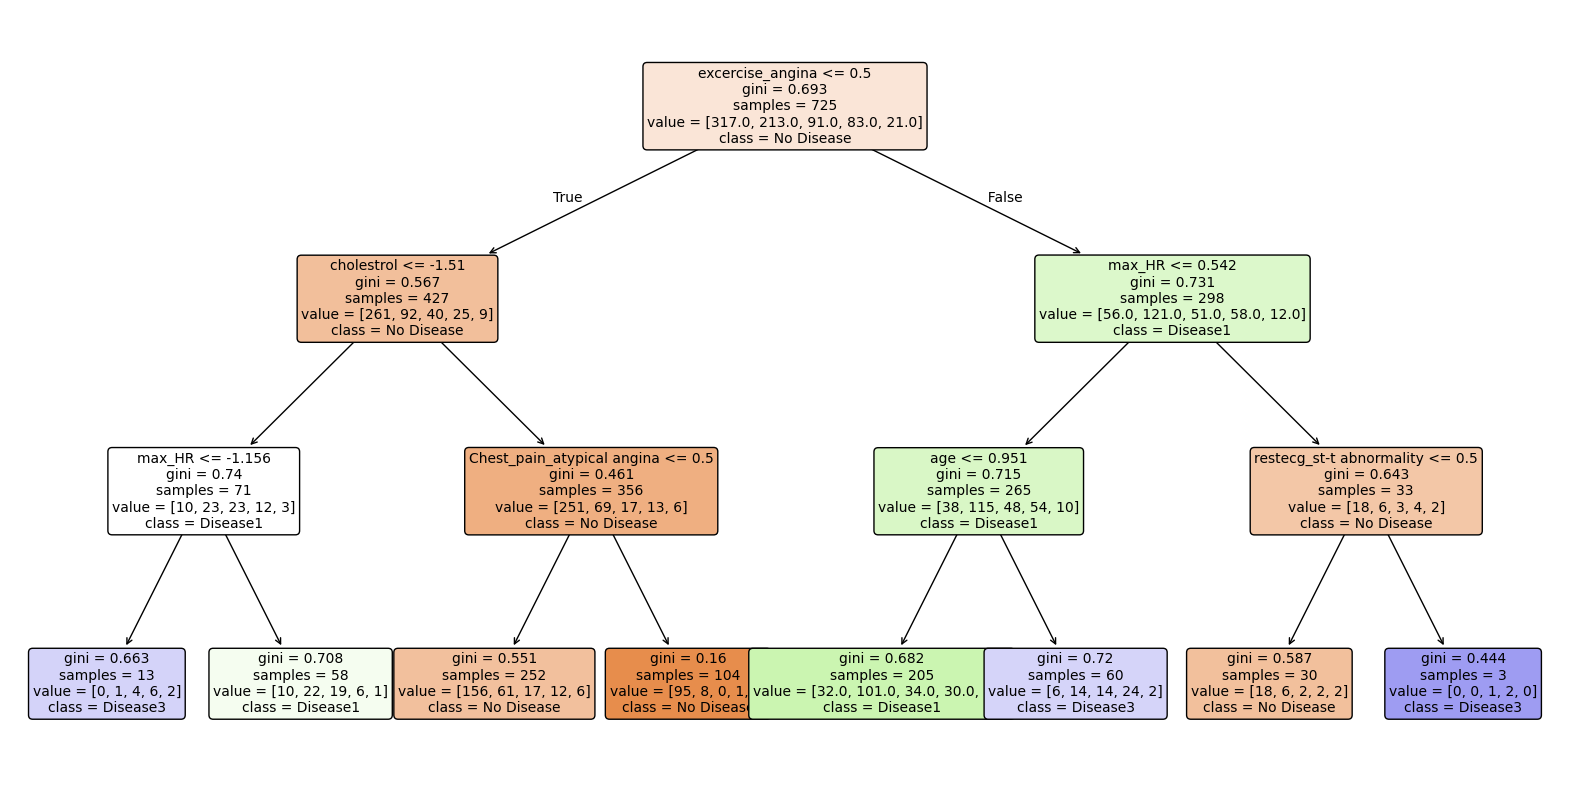

In [244]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Disease','Disease1','Disease2','Disease3','Disease4'], 
          filled=True, rounded=True, fontsize=10)
plt.show()

Feature Importances:
 excercise_angina                  0.443381
cholestrol                        0.267308
max_HR                            0.104182
Chest_pain_atypical angina        0.093225
age                               0.067959
restecg_st-t abnormality          0.023945
fasting_bs                        0.000000
oldpeak                           0.000000
rest_BP                           0.000000
sex_Male                          0.000000
Chest_pain_non-anginal            0.000000
Chest_pain_typical angina         0.000000
restecg_normal                    0.000000
slope_flat                        0.000000
slope_upsloping                   0.000000
thallassemia_normal               0.000000
thallassemia_reversable defect    0.000000
dtype: float64


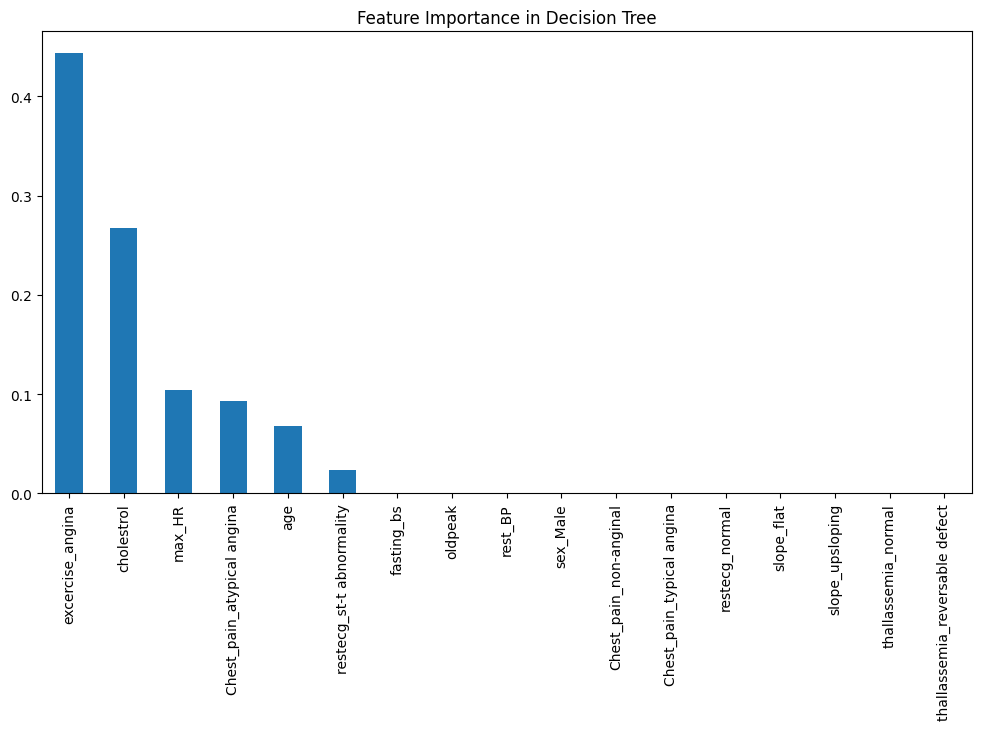

In [242]:
importances = pd.Series(best_dt.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)
print("Feature Importances:\n", importances)

# Optional: bar plot
importances.plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance in Decision Tree")
plt.show()
